
# <center>`Анализ библиотеки`<span style='color:red'>FaceRecognition</span>
___

Ссылки на `документацию`:

1. [Репозиторий face_recognition](https://github.com/ageitgey/face_recognition/) 
2. [Статья по внутренней работе библиотеки face_recognition](https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78)

Дополнительные материалы:

3. [Face Recognition Pipeline Clearly Explained](https://medium.com/backprop-labs/face-recognition-pipeline-clearly-explained-f57fc0082750)
4. [Распознавание лиц: подробное объяснение бумаги "Arcface"](https://russianblogs.com/article/51201299672/)

___
<a id=100>Содержание</a>
- [Краткое описание библиотеки](#1)
- [Обзор основных функций библиотеки](#2)
    - [Обнаружение лиц](#3)
    - [Распознавание лица](#4)

___
## <center><a id=1 >Краткое описание библиотеки</a>

Библиотека [face_recognition](https://github.com/ageitgey/face_recognition/) известна как один из самых простых API для распознавания лиц на Python и командной строке. Разработанная Адамом Гейтгеем, эта библиотека использует модели глубокого обучения для обнаружения и распознавания лиц. Вот краткий обзор ее функций и возможностей:

___
## <center><a id=2 >Обзор основных функций библиотеки</a>

- Простота использования: Библиотека разработана для удобства пользователя, позволяя распознавать лица с помощью всего нескольких строк кода на Python или простых команд в командной строке.
- Обнаружение лиц: Она может обнаруживать лица на изображениях и в видео, предоставляя координаты каждого обнаруженного лица. Обнаружение может выполняться с использованием как традиционных моделей на основе HOG, так и более точных моделей глубокого обучения, которые требуют ускорения на GPU.
- Распознавание лиц: Библиотека может сравнивать лица и распознавать известных людей, кодируя черты лиц в векторы. Это позволяет эффективно сопоставлять и распознавать лица.
- Идентификация черт лица: Она может находить и идентифицировать конкретные черты лица, такие как глаза, нос и рот, на изображениях.
- Параллельная обработка: Поддерживает параллельную обработку, что позволяет быстрее обрабатывать изображения, используя несколько ядер процессора.


### <center><a id=3 >Обнаружение лиц</a>

Библиотека face_recognition использует передовые методы глубокого обучения для обнаружения и распознавания лиц. Рассмотрим процесс детекции лиц, описанный Адамом Гейтгеем в статье ["Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning"](https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78)

Первый этап в нашем процессе распознавания лиц — это обнаружение лиц. Прежде чем мы сможем различать лица, нам необходимо их найти на фотографии.

Если вы использовали любую камеру за последние 10 лет, вероятно, вы видели работу функции обнаружения лиц. Эта функция позволяет камере автоматически выделять лица, чтобы обеспечить их фокусировку перед съемкой. Однако мы будем использовать эту технологию для другой цели — нахождения областей изображения, которые нужно передать на следующий этап обработки.

Обнаружение лиц стало популярным в начале 2000-х годов, когда Пол Виола и Майкл Джонс изобрели метод, достаточно быстрый для работы на дешевых камерах. Но теперь существуют более надежные решения. Мы будем использовать метод, разработанный в 2005 году, известный как Гистограмма направленных градиентов (Histogram of Oriented Gradients, HOG).

Для поиска лиц на изображении мы начнем с преобразования изображения в черно-белое, так как нам не нужны цветовые данные для обнаружения лиц:


Затем мы будем анализировать каждый пиксель изображения по очереди. Для каждого пикселя мы будем смотреть на окружающие его пиксели, чтобы определить, насколько текущий пиксель темнее по сравнению с окружающими:


Наша цель — определить направление, в котором изображение становится темнее. Затем мы нарисуем стрелку, показывающую, в каком направлении изображение темнеет:


Если повторить этот процесс для каждого пикселя, мы получим изображение, где каждый пиксель заменен стрелкой, показывающей направление градиента — изменения от светлого к темному по всему изображению:


Анализ пикселей напрямую не всегда эффективен, так как яркие и темные изображения одного и того же лица будут иметь разные значения пикселей. Используя направление изменения яркости, мы получаем одинаковое представление как для ярких, так и для темных изображений, что значительно упрощает задачу.

Однако хранение градиентов для каждого пикселя дает слишком много деталей. Нам нужно упростить изображение, чтобы увидеть общую структуру. Для этого мы разобьем изображение на маленькие квадраты размером 16x16 пикселей. В каждом квадрате мы посчитаем количество градиентов, указывающих в каждое из основных направлений (вверх, вверх-вправо, вправо и т.д.). Затем мы заменим этот квадрат стрелкой, указывающей в доминирующее направление:


Итоговое изображение представляет собой простое отображение основных структур лица, независимо от яркости изображения:


Для обнаружения лиц в таком изображении HOG нам нужно найти часть изображения, наиболее похожую на известный образец HOG, извлеченный из множества тренировочных лиц:


Используя эту технику, мы можем легко находить лица на любом изображении:


Пример кода на Python с использованием библиотеки dlib
Чтобы попробовать этот метод самостоятельно с использованием Python и библиотеки dlib, можно воспользоваться следующим примером кода:

<img src='../static/img/HOG.webp'>

### Пример реализации при помощи библиотеки dlib

Лицо 0: Верхний левый угол (407, 325) Нижний правый угол (593, 511)


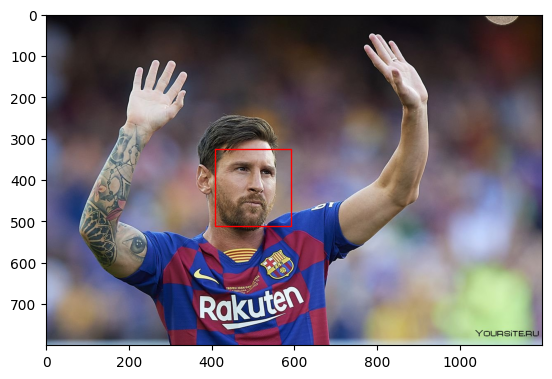

In [18]:
import dlib
from skimage import io

# Загружаем изображение
image = io.imread("../Messi.png")

# Создаем объект детектора лиц
face_detector = dlib.get_frontal_face_detector()

# Применяем детектор к изображению
detected_faces = face_detector(image, 1)

# Отображаем обнаруженные лица
for i, face_rect in enumerate(detected_faces):
    print(f"Лицо {i}: Верхний левый угол ({face_rect.left()}, {face_rect.top()}) "
          f"Нижний правый угол ({face_rect.right()}, {face_rect.bottom()})")
    
# Отображаем изображение с обведенными лицами в plot
import matplotlib.pyplot as plt

plt.imshow(image)
for face_rect in detected_faces:
    plt.gca().add_patch(plt.Rectangle((face_rect.left(), face_rect.top()),
                                      face_rect.right() - face_rect.left(),
                                      face_rect.bottom() - face_rect.top(), fill=False, color='red'))
plt.show()


#### Пример реализации при помощи face_recognition

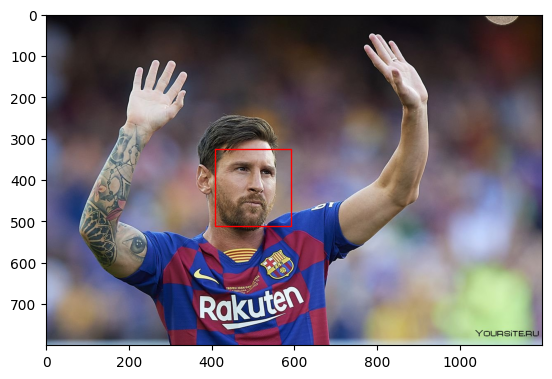

In [13]:
import face_recognition
image = face_recognition.load_image_file("../Messi.png")
face_locations = face_recognition.face_locations(image)

# show image with face locations via plot
import matplotlib.pyplot as plt

plt.imshow(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y = left, top
    w = right - left
    h = bottom - top
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red')
    plt.gca().add_patch(rect)


### <center><a id=4 >Распознование лиц</a>

Распознование лиц состоит из 4х шагов.

### Шаг 1: Обнаружение лиц
Первый шаг — это обнаружение лиц на изображении. Этот процесс начинается с преобразования изображения в черно-белое для упрощения дальнейшего анализа. Затем, используя метод гистограммы направленных градиентов (HOG), каждое изображение разбивается на небольшие квадраты, в каждом из которых анализируются направления градиентов. Это позволяет получить упрощенное представление изображения, где захвачены основные структуры лица. Обнаружение лиц выполняется путем поиска участков изображения, наиболее схожих с известными шаблонами HOG, полученными из тренировочных данных.

### Шаг 2: Определение и выравнивание поз лиц
После обнаружения лиц следующим шагом является обработка лиц, повернутых в разных направлениях. Для этого используется алгоритм оценки ориентиров лица, который определяет 68 ключевых точек на каждом лице (например, уголки глаз, кончик носа и т.д.). Эти ориентиры используются для выравнивания лиц так, чтобы глаза и рот находились в одних и тех же позициях на всех изображениях, что упрощает последующее распознавание.

### Шаг 3: Кодирование лиц
На этом этапе мы переходим к основной задаче распознавания лиц — различению и идентификации лиц. Процесс кодирования лиц включает следующие ключевые моменты:

#### Сверточная нейронная сеть (CNN):

Для кодирования лиц используется глубокая сверточная нейронная сеть, обученная генерировать эмбеддинги — векторы признаков размером 128 элементов, которые представляют уникальные характеристики каждого лица.
Нейронная сеть обучается с использованием подхода, при котором она рассматривает три изображения одновременно: одно изображение известного лица, второе изображение того же лица и третье изображение совершенно другого человека. Цель состоит в том, чтобы минимизировать расстояние между эмбеддингами изображений одного и того же человека и максимизировать расстояние между эмбеддингами различных людей.
#### Процесс обучения:

Нейронная сеть обучается на большом количестве изображений, чтобы она могла надежно генерировать эмбеддинги, которые будут одинаковыми для одного и того же лица, независимо от условий освещения и угла поворота головы.
Этот процесс требует значительных вычислительных ресурсов и времени. Например, обучение сети на мощной графической карте NVidia Tesla может занять около 24 часов непрерывной работы.
### Шаг 4: Распознавание лиц
После того как мы закодировали лица, следующим шагом является их идентификация. Этот процесс включает в себя:

#### Сравнение эмбеддингов:

Для распознавания лица эмбеддинг неизвестного лица сравнивается с эмбеддингами всех известных лиц в базе данных.
Алгоритм измеряет расстояние между эмбеддингами и выбирает наиболее близкое совпадение. Если расстояние меньше определенного порогового значения, то лицо считается распознанным.

#### Оптимизация поиска:

В системах с большим количеством пользователей, таких как социальные сети, простое сравнение каждого нового изображения со всеми известными изображениями не является эффективным.
Для ускорения процесса используются специальные структуры данных и алгоритмы, такие как k-ближайшие соседи (k-NN) и методы индексации, которые позволяют быстро находить наиболее близкие эмбеддинги.

#### Пример кода на Python:

Вот пример кода, показывающего, как можно использовать библиотеку face_recognition для кодирования и сравнения лиц:
python

[False]
[True]


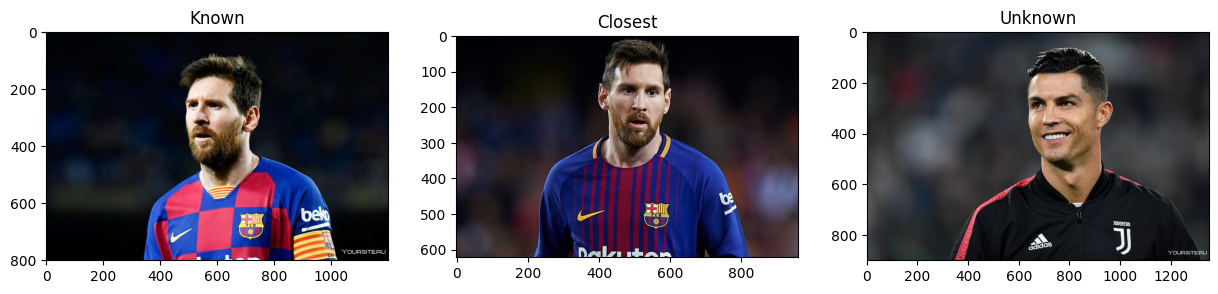

In [19]:
known_image = face_recognition.load_image_file("../known.png")
closest_image = face_recognition.load_image_file("../closest.png")
unknown_image = face_recognition.load_image_file("../unknown.png")

known_encoding = face_recognition.face_encodings(known_image)[0]
closest_encoding = face_recognition.face_encodings(closest_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([known_encoding], unknown_encoding)
print(results)
results = face_recognition.compare_faces([known_encoding], closest_encoding)
print(results)
# plot images with label (Closest or Unknown) in one row
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(known_image)
ax[0].set_title("Known")
ax[1].imshow(closest_image)
ax[1].set_title("Closest")
ax[2].imshow(unknown_image)
ax[2].set_title("Unknown")
plt.show()